# TASK 1 - SPAM SMS DETECTION


# Importing the libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [3]:
try:
    data = pd.read_csv('spam2.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('spam2.csv', encoding='latin-1')

# Datatype

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
l=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data.drop(l,axis=1,inplace=True)
print(data)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:
data['v1']=data['v1'].replace(['ham','spam'],[0,1])
print(data)
     

      v1                                                 v2
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
...   ..                                                ...
5567   1  This is the 2nd time we have tried 2 contact u...
5568   0              Will Ì_ b going to esplanade fr home?
5569   0  Pity, * was in mood for that. So...any other s...
5570   0  The guy did some bitching but I acted like i'd...
5571   0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
data.rename(columns = {'v1':'Label','v2':'Message'}, inplace = True)
print(data)

      Label                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0              Will Ì_ b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5572 rows x 2 columns]


# Shape

In [8]:
data.shape

(5572, 2)

In [9]:
data.isna().sum()


Label      0
Message    0
dtype: int64

# Describing the data

In [10]:
data.describe()

,Label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Data Visualization

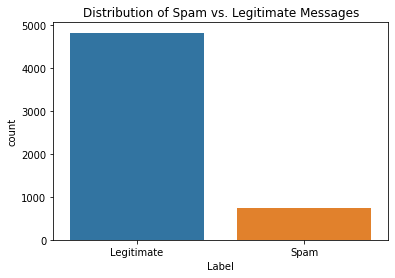

In [11]:
sns.countplot(data['Label'])
plt.title('Distribution of Spam vs. Legitimate Messages')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Spam'])
plt.show()

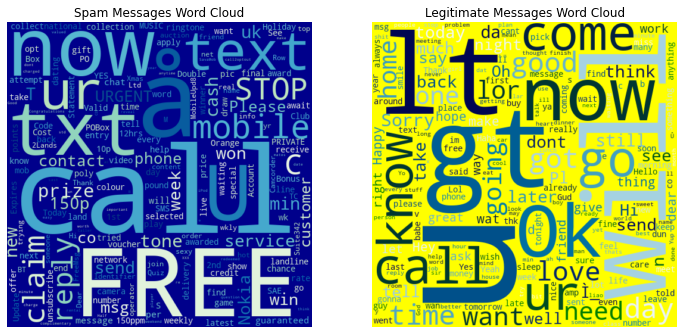

In [12]:
from wordcloud import WordCloud

spam_words = ' '.join(list(data[data['Label'] == 1]['Message']))
spam_wc = WordCloud(width=512, height=512, collocations=False, colormap="GnBu", background_color="darkblue").generate(spam_words)

legit_words = ' '.join(list(data[data['Label'] == 0]['Message']))
legit_wc = WordCloud(width=512, height=512, collocations=False, colormap="ocean_r", background_color="yellow").generate(legit_words)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(legit_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Legitimate Messages Word Cloud')

plt.show()

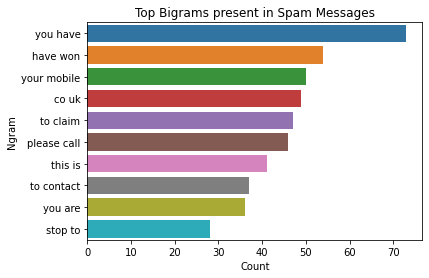

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(text, ngram_range=(1,1), top_n=10, title="Top N-Grams"):
    vectorizer = CountVectorizer(ngram_range=ngram_range).fit(text)
    bow = vectorizer.transform(text)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = words_freq[:top_n]
    df = pd.DataFrame(top_words, columns=['Ngram', 'Count'])
    sns.barplot(x='Count', y='Ngram', data=df)
    plt.title(title)
    plt.show()

# For bigrams in spam messages
plot_top_ngrams(data[data['Label'] == 1]['Message'], ngram_range=(2,2), title="Top Bigrams present in Spam Messages")

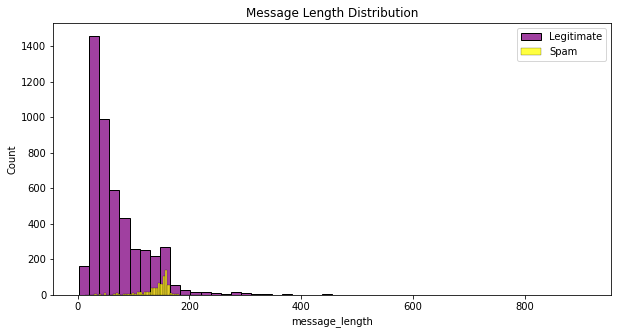

In [14]:
data['message_length'] = data['Message'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(data[data['Label'] == 0]['message_length'], bins=50, color='purple', label='Legitimate')
sns.histplot(data[data['Label'] == 1]['message_length'], bins=50, color='yellow', label='Spam')
plt.title('Message Length Distribution')
plt.legend()
plt.show()

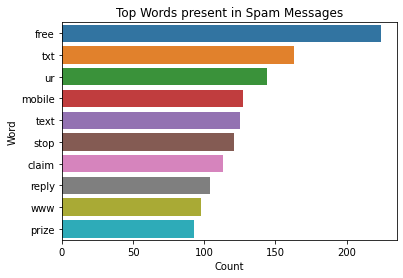

In [15]:
def plot_top_words(text, top_n=10, title="Top Words"):
    vectorizer = CountVectorizer(stop_words='english').fit(text)
    bow = vectorizer.transform(text)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = words_freq[:top_n]
    df = pd.DataFrame(top_words, columns=['Word', 'Count'])
    sns.barplot(x='Count', y='Word', data=df)
    plt.title(title)
    plt.show()

plot_top_words(data[data['Label'] == 1]['Message'], title="Top Words present in Spam Messages")

# Model Building

# Loading the models

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Message'])
Y= data['Label']
print(X,Y)

  (0, 8026)	0.19609779550499865
  (0, 1051)	0.3509649021061901
  (0, 3494)	0.16470488207184114
  (0, 1994)	0.2964965675440533
  (0, 1701)	0.33503393550839805
  (0, 4349)	0.2964965675440533
  (0, 8227)	0.23740046706740073
  (0, 3534)	0.19387320529717864
  (0, 1703)	0.2964965675440533
  (0, 1271)	0.2625103008882829
  (0, 2271)	0.27179815735762314
  (0, 5741)	0.2745089285415426
  (0, 4224)	0.3509649021061901
  (1, 5369)	0.5465881710238072
  (1, 8134)	0.4316010362639011
  (1, 4192)	0.5236458071582338
  (1, 4385)	0.4082988561907181
  (1, 5343)	0.27211951321382544
  (2, 77)	0.23759715224911548
  (2, 1128)	0.1707825659976717
  (2, 6062)	0.1707825659976717
  (2, 7701)	0.12576907263059747
  (2, 7028)	0.1989696587085652
  (2, 6010)	0.1808417865094903
  (2, 6115)	0.16914304332607796
  :	:
  (5567, 5118)	0.2445888397614688
  (5567, 8202)	0.19074118816829963
  (5567, 2000)	0.185955090206136
  (5567, 5894)	0.19532744699307247
  (5567, 6062)	0.23098372602432177
  (5568, 2907)	0.6005703500933404
  (55

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [19]:
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (3900, 8404)
x_test.shape: (1672, 8404)
y_train.shape: (3900,)
y_test.shape: (1672,)


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training df
nb_classifier.fit(x_train, y_train)

# Predict on the test df
y_pred = nb_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9677033492822966
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [22]:
models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))

# Non-linear Models
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC(gamma = "auto")))

print("Model Accuracy")

# Evaluating each Models
names = []
accuracy = []
for name, model in models:
    
    # 10 Cross Fold Validation for each Models
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    # Displaying the Accuracy of each Model in Validation
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: Accuracy = %f" % (name, cv_results.mean())
    print(msg)

Model Accuracy
LR: Accuracy = 0.944359
DTC: Accuracy = 0.968205
SVC: Accuracy = 0.864615


In [23]:
models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))

# Non-linear Models
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVC', SVC(gamma = "auto")))

In [24]:
def test_model(model):
    # Training the Dataset with Training Set
    model.fit(x_train, y_train)
    
    # Predicting the Values with Testing Set
    predictions = model.predict(x_test)
    
    # Model Testing Results
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [25]:
# Predicting the Values
for name, model in models:
    print("--------------------------------------------------------")
    print("Testing:", name)
    test_model(model)

--------------------------------------------------------
Testing: LR
Accuracy: 0.9449760765550239
Confusion Matrix:
[[1450    3]
 [  89  130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1453
           1       0.98      0.59      0.74       219

    accuracy                           0.94      1672
   macro avg       0.96      0.80      0.85      1672
weighted avg       0.95      0.94      0.94      1672

--------------------------------------------------------
Testing: CART
Accuracy: 0.9688995215311005
Confusion Matrix:
[[1436   17]
 [  35  184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1453
           1       0.92      0.84      0.88       219

    accuracy                           0.97      1672
   macro avg       0.95      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672

------------

# Model Saving

In [26]:
import pickle

In [27]:
for model in models:
    filename = ".pkl"
    pickle.dump(model, open(filename, 'wb'))
print("Saved all Models")
     

Saved all Models


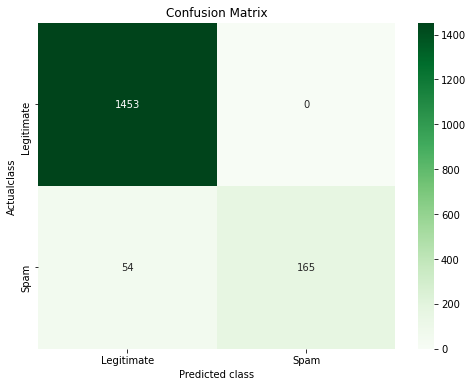

In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['Legitimate', 'Spam'], yticklabels=['Legitimate', 'Spam'])
plt.ylabel('Actualclass')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')
plt.show()